In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [38]:
data = pd.read_csv("A:/Ipython/Breast Cancer Classification/Data/breast-cancer-wisconsin.data.csv")
data.shape

(699, 11)

In [32]:
#Let us get a feel for the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID          699 non-null int64
CT          699 non-null int64
UC Size     699 non-null int64
UC Shape    699 non-null int64
MA          699 non-null int64
SECS        699 non-null int64
BN          699 non-null object
BC          699 non-null int64
NN          699 non-null int64
Mito        699 non-null int64
Y           699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [33]:
#Check for missing values
data.isnull().sum()
#This is a clean dataset

ID          0
CT          0
UC Size     0
UC Shape    0
MA          0
SECS        0
BN          0
BC          0
NN          0
Mito        0
Y           0
dtype: int64

In [34]:
#The obejctive here to build a classifer 
#Let check out target vairable
data['Y'].value_counts()

2    458
4    241
Name: Y, dtype: int64

In [41]:
#Let us now transform the attribtues
data.replace('?', np.nan, inplace=True)     
data = data.dropna(axis=0, how="any")

In [49]:
data['Y'] = data['Y'].map({2:0, 4:1})

In [50]:
target_dist = data['Y'].value_counts()/data['Y'].shape[0] * 100

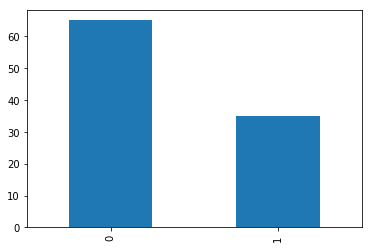

In [51]:
target_dist.plot(kind = 'bar')

In [52]:
#Accuracy won't be a very appropriate metric.
X = data[['CT', 'UC Size', 'UC Shape', 'MA', 'SECS', 'BN', 'BC', 'NN', 'Mito']]
y = data[['Y']]

X.head(3)

,CT,UC Size,UC Shape,MA,SECS,BN,BC,NN,Mito
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1


In [53]:
y.head(3)

,Y
0,0
1,0
2,0


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)


In [95]:
logistic = LogisticRegression().fit(X_train, y_train.values.ravel())
yhat = logistic.predict(X_test)


In [62]:
print("F1 for Random Forest :" + str(f1_score(y_test, yhat, average="macro")))
print("Precison for Random Forest :" + str(precision_score(y_test, yhat, average="macro")))
print("Recall for Random Forest :" + str(recall_score(y_test, yhat, average="macro"))  )

F1 for Random Forest :0.95231458437
Precison for Random Forest :0.952903091061
Recall for Random Forest :0.951736610863


In [71]:
conf  = confusion_matrix(y_test, yhat)
conf

array([[297,  10],
       [ 11, 161]], dtype=int64)

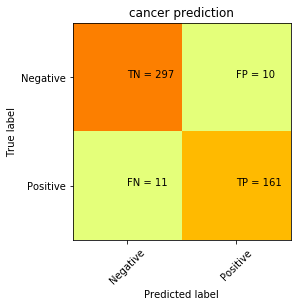

In [75]:
plt.clf()
plt.imshow(conf, cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('cancer prediction')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf[i][j]))
plt.show()

In [89]:
#Oh No, 11 people with cancer are diagnosed as not having cancer, this isn't right
fpr, tpr, threshold = roc_curve(y_test, yhat)
roc_auc = auc(fpr, tpr)
threshold

array([2, 1, 0], dtype=int64)

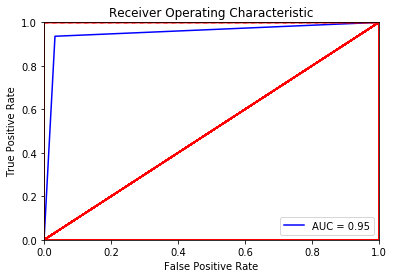

In [93]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot(y_test, yhat,'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [113]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6,8]}, 
              {'bootstrap':[False],'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6,8] }]
Random = RandomForestClassifier()
gridsearch = GridSearchCV(Random, param_grid, cv =5)
gridsearch.fit(X_train, y_train.values.ravel())
gridsearch.best_params_

{'max_features': 2, 'n_estimators': 10}

In [114]:
Random = RandomForestClassifier()
Random.fit(X_train, y_train.values.ravel())
values = sorted(zip(X_train.columns, Random.feature_importances_), key=lambda x: x[1] * -1)
print(values, headers)

[('BN', 0.47387677635527226), ('CT', 0.19499521904983608), ('UC Shape', 0.10296407286477519), ('BC', 0.086123731527741276), ('UC Size', 0.084390434434050768), ('MA', 0.043547276438602407), ('SECS', 0.0087054277437326605), ('NN', 0.0031287706996036557), ('Mito', 0.0022682908863857266)] ['name', 'score']


In [101]:
y_pred = gridsearch.predict(X_test)
print("F1 for Random Forest :" + str(f1_score(y_test, yhat, average="macro")))
print("Precison for Random Forest :" + str(precision_score(y_test, yhat, average="macro")))
print("Recall for Random Forest :" + str(recall_score(y_test, yhat, average="macro"))  )

F1 for Random Forest :0.95231458437
Precison for Random Forest :0.952903091061
Recall for Random Forest :0.951736610863
